In [232]:
import pandas as pd
df = pd.read_csv('fraud.csv')

https://www.kaggle.com/arjunjoshua/predicting-fraud-in-financial-payment-services

In [233]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [242]:
df[df['isFraud']==1].groupby('type').count()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,,,
CASH_OUT,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116
TRANSFER,4097,4097,4097,4097,4097,4097,4097,4097,4097,4097


In [243]:
df[df['isFlaggedFraud']==1].groupby('type').count()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,,,
TRANSFER,16,16,16,16,16,16,16,16,16,16


In [146]:
myval = df[df['isFraud']==1]['type'].drop_duplicates()
tolist = list(myval)

print ('the values are {}'.format(tolist))


the values are ['TRANSFER', 'CASH_OUT']


## OK, now I want to find out if those name orig flagged as fraud have more than one transaction. 


In [246]:
fraud_source = df[df['isFraud']==1]['nameOrig'].reset_index(drop=True)
fraud_source.head()

0    C1305486145
1     C840083671
2    C1420196421
3    C2101527076
4     C137533655
Name: nameOrig, dtype: object

In [257]:
x = fraud_source.shape

print('so we have {} customers who are flagged with fraud'.format(x[0]))


so we have 8213 customers who are flagged with fraud


In [264]:
fraud_details = df[df['nameOrig'].isin(fraud_source)]
y = fraud_details.shape[0]

print('So we have {} fraud transactions but customers have {} transactions'.format(x[0],y))

So we have 8213 fraud transactions but customers have 8241 transactions


In [274]:
fraud_details.groupby('nameOrig').filter(lambda x:x['isFlaggedFraud'].count()>1).sort_values('nameOrig')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3450759,257,PAYMENT,2496.73,C1015856166,0.00,0.00,M183948217,0.00,0.00,0,0
6018798,453,CASH_OUT,2600970.32,C1015856166,2600970.32,0.00,C1424612838,2111795.89,4712766.22,1,0
448855,19,CASH_IN,78603.46,C1044518032,1592298.26,1670901.72,C1544000930,156378.24,0.00,0,0
5563738,388,CASH_OUT,20393.12,C1044518032,20393.12,0.00,C1479987881,293446.62,313839.74,1,0
4773752,335,PAYMENT,5538.46,C10982843,29270.00,23731.54,M1708468225,0.00,0.00,0,0
3630051,274,TRANSFER,49210.21,C10982843,49210.21,0.00,C803239144,0.00,0.00,1,0
788647,39,TRANSFER,152042.16,C1118399210,152042.16,0.00,C104038589,0.00,0.00,1,0
5316320,374,CASH_OUT,157652.30,C1118399210,412985.11,255332.82,C1261603872,414188.61,571840.90,0,0
1577582,155,CASH_OUT,172945.40,C1127304441,0.00,0.00,C274303891,738154.34,1215491.90,0,0
6032849,475,CASH_OUT,876753.11,C1127304441,876753.11,0.00,C1403814902,0.00,876753.11,1,0


In [202]:
df.head(100).sort_values('nameOrig')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
14,1,PAYMENT,4098.78,C1026483832,503264.0,499165.22,M1635378213,0.00,0.00,N,0
25,1,PAYMENT,6061.13,C1043358826,443.0,0.00,M1558079303,0.00,0.00,N,0
57,1,PAYMENT,2252.44,C104716441,1627.0,0.00,M1506951181,0.00,0.00,N,0
27,1,PAYMENT,8009.09,C1053967012,10968.0,2958.91,M295304806,0.00,0.00,N,0
66,1,PAYMENT,4910.14,C1131592118,41551.0,36640.86,M589987187,0.00,0.00,N,0
...,...,...,...,...,...,...,...,...,...,...,...
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.00,51513.44,N,0
90,1,TRANSFER,358831.92,C908084672,0.0,0.00,C392292416,474384.53,3420103.09,N,0
53,1,PAYMENT,1614.64,C912966811,41276.0,39661.36,M1792384402,0.00,0.00,N,0
37,1,PAYMENT,2791.42,C923341586,300481.0,297689.58,M107994825,0.00,0.00,N,0


In [205]:
mylist = df[df['isFraud']=='Y']['nameOrig']

In [209]:
len(mylist)

8213

In [210]:
chk = df[df['nameOrig'].isin(mylist)]

In [212]:
chk[chk['isFraud']=='N']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
154224,12,CASH_OUT,68456.34,C1498185758,0.00,0.00,C729255592,357254.05,425710.38,N,0
426565,18,CASH_IN,176257.03,C803411135,720553.99,896811.02,C1442022106,687695.22,696524.95,N,0
448855,19,CASH_IN,78603.46,C1044518032,1592298.26,1670901.72,C1544000930,156378.24,0.00,N,0
522904,20,CASH_OUT,159118.03,C1885333477,795.00,0.00,C2002613445,1048948.29,1208066.32,N,0
702836,37,CASH_OUT,133837.91,C1882162040,170.00,0.00,C1476569580,1549511.12,1683349.03,N,0
1218869,133,TRANSFER,648354.02,C1191696703,0.00,0.00,C801789069,2661849.03,3414252.64,N,0
1577582,155,CASH_OUT,172945.40,C1127304441,0.00,0.00,C274303891,738154.34,1215491.90,N,0
1772476,162,CASH_IN,528.63,C171834973,154.00,682.63,C2116197233,0.00,0.00,N,0
2636459,209,PAYMENT,4310.42,C876181265,10640.00,6329.58,M321063872,0.00,0.00,N,0
2856324,227,CASH_IN,29371.08,C471097879,21946.00,51317.08,C1377801274,281406.64,252035.57,N,0


In [214]:
df[df['nameOrig']=='C1498185758']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
154224,12,CASH_OUT,68456.34,C1498185758,0.00,0.0,C729255592,357254.05,425710.38,N,0
2516796,205,TRANSFER,566156.42,C1498185758,566156.42,0.0,C1639518321,0.00,0.00,Y,0


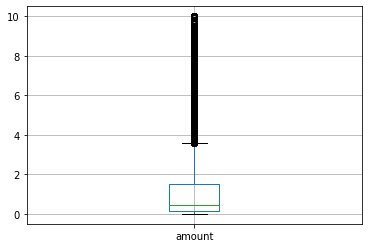

In [230]:
chk[chk['isFraud']=='Y'].boxplot(column=['amount'])

In [228]:
chk.loc[:,'amount']/=1000000

C:\Users\m118954\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [229]:
chk

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,$M,mil
2,1,TRANSFER,0.000181,C1305486145,181.00,0.0,C553264065,0.00,0.00,Y,0,0.000181,0.000181
3,1,CASH_OUT,0.000181,C840083671,181.00,0.0,C38997010,21182.00,0.00,Y,0,0.000181,0.000181
251,1,TRANSFER,0.002806,C1420196421,2806.00,0.0,C972765878,0.00,0.00,Y,0,0.002806,0.002806
252,1,CASH_OUT,0.002806,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,Y,0,0.002806,0.002806
680,1,TRANSFER,0.020128,C137533655,20128.00,0.0,C1848415041,0.00,0.00,Y,0,0.020128,0.020128
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,0.339682,C786484425,339682.13,0.0,C776919290,0.00,339682.13,Y,0,0.339682,0.339682
6362616,743,TRANSFER,6.311409,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,Y,0,6.311409,6.311409
6362617,743,CASH_OUT,6.311409,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,Y,0,6.311409,6.311409
6362618,743,TRANSFER,0.850003,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,Y,0,0.850003,0.850003


In [201]:
def mybal(isFraud,amt,oldbalanceOrg,newbal):
    if isFraud == 1:
        variance = (oldbalanceOrg - amt)
        if variance == newbal:
            chk = 'ok'
    else:
        variance = 0
        chk = 'dont worry'
        
    return chk

In [130]:
df2.apply(lambda x: mybal(x['isFraud'],x['amount'],x['oldbalanceOrg'],x['newbalanceOrig']),axis=1)

0    dont worry
1    dont worry
2            ok
3            ok
4    dont worry
dtype: object

In [93]:


df['newcolumn'] = df.apply(lambda x: fxy(x['A'], x['B']), axis=1)
df


,A,B,newcolumn
0,10,20,200
1,20,30,600
2,30,10,300


In [79]:
def mybal(a,b):
    h = a - b
    return h

0          shit
1          shit
2          shit
3          shit
4          shit
           ... 
6362615    shit
6362616    shit
6362617    shit
6362618    shit
6362619    shit
Name: type, Length: 6362620, dtype: object

In [51]:
df2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,chk
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,983964.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,186428.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,18100.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,18100.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1166814.0


In [70]:
dfnew=pd.DataFrame({ 'year': [2015,2016],
                      'month': [10, 12],
                      'day': [25,31]}) 
print(dfnew)

   year  month  day
0  2015     10   25
1  2016     12   31


In [73]:
def yearCalc(year,month,n):
    if year == 2016:
        print("year:{} month:{}".format(year, month))
        return year * month * n
    else: 
        return year



In [76]:
df[['year' ,'month']].apply(lambda x: yearCalc(x['year'],x['month'],2),axis=1)

KeyError: "None of [Index(['year', 'month'], dtype='object')] are in the [columns]"